In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
history_df = pd.read_csv("data/music_listening.csv")

In [31]:
history_df

,userid,timestamp,musicbrainz_artist_id,artist_name,musicbrainz-track_id,track_name,artist_track,artist_tags,artist_name_corrected
0,1,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,"['Deep Dish', 'Fuck Me Im Famous (Pacha Ibiza)...","House, electronic, dance, Progressive House, t...",Deep Dish
1,1,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),"['坂本龍一', 'Composition 0919 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
2,1,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),"['坂本龍一', 'Mc2 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
3,1,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),"['坂本龍一', 'Hibari (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
4,1,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),"['坂本龍一', 'Mc1 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
...,...,...,...,...,...,...,...,...,...
19098857,1000,2008-01-27 22:02:35,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me,"['Wilco', 'Please Be Patient With Me']","Alt-country, indie, seen live, indie rock, alt...",Wilco
19098858,1000,2008-01-27 21:56:52,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off,"['Wilco', 'Shake It Off']","Alt-country, indie, seen live, indie rock, alt...",Wilco
19098859,1000,2008-01-27 21:52:36,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds,"['Wilco', 'Side With The Seeds']","Alt-country, indie, seen live, indie rock, alt...",Wilco
19098860,1000,2008-01-27 21:49:12,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky,"['Wilco', 'Sky Blue Sky']","Alt-country, indie, seen live, indie rock, alt...",Wilco


In [4]:
user_list = history_df['userid'].drop_duplicates().to_list()

In [5]:
len(user_list)

992

In [6]:
DF_user_list = []
for user in user_list:
    DF_user_list.append(history_df[history_df['userid'] == user].reset_index())

In [7]:
artist_track_set = []
length_set = []
all_length_set = []
proportion_set = []
user_length_dict = []

for i in range(len(user_list)):
    temp_artist_track_set = DF_user_list[i]['artist_track'].iloc[DF_user_list[i]['artist_track'].astype(str).drop_duplicates().index]
    length_set.append(temp_artist_track_set.shape[0])
    all_length_set.append(temp_artist_track_set.index[-1] + 1)
    
    temp_dict = {k:temp_artist_track_set.index[k] for k in range(temp_artist_track_set.shape[0])}
    temp_df = pd.DataFrame(temp_dict.items(), columns=['d_t', 't'])
    
    user_length_dict.append(temp_df)
    
    proportion_set.append(temp_artist_track_set.shape[0]/(temp_artist_track_set.index[-1] + 1))
    artist_track_set.append(temp_artist_track_set)

In [8]:
length_set = np.array(length_set)
all_length_set = np.array(all_length_set)
proportion_set = np.array(proportion_set)

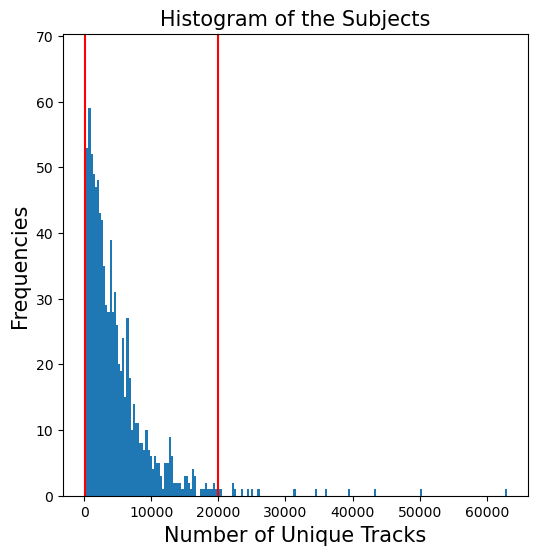

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(length_set,bins = 200)

plt.axvline(x=200, color="r")
plt.axvline(x=20000, color="r")

plt.xlabel("Number of Unique Tracks", fontsize=15)
plt.ylabel("Frequencies", fontsize=15)
plt.title("Histogram of the Subjects", fontsize=15)
plt.show()

## Preprocess data - Filter users

In [11]:
user_list = np.array(user_list)[(length_set > 200) & (length_set < 20000) & (proportion_set < 0.975) & (proportion_set > 0.025)]

In [80]:
print(((length_set <= 200)|(length_set >= 20000)).sum())
print((proportion_set >= 0.975).sum())
print((proportion_set <= 0.025).sum())

64
31
1


In [12]:
len(user_list)

920

In [13]:
DF_user_list = []
for user in user_list:
    DF_user_list.append(history_df[history_df['userid'] == user].reset_index())

In [14]:
len(DF_user_list)

920

In [32]:
pd.concat(DF_user_list)

,index,userid,timestamp,musicbrainz_artist_id,artist_name,musicbrainz-track_id,track_name,artist_track,artist_tags,artist_name_corrected
0,0,1,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,"['Deep Dish', 'Fuck Me Im Famous (Pacha Ibiza)...","House, electronic, dance, Progressive House, t...",Deep Dish
1,1,1,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),"['坂本龍一', 'Composition 0919 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
2,2,1,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),"['坂本龍一', 'Mc2 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
3,3,1,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),"['坂本龍一', 'Hibari (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
4,4,1,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),"['坂本龍一', 'Mc1 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
...,...,...,...,...,...,...,...,...,...,...
18368,19098857,1000,2008-01-27 22:02:35,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me,"['Wilco', 'Please Be Patient With Me']","Alt-country, indie, seen live, indie rock, alt...",Wilco
18369,19098858,1000,2008-01-27 21:56:52,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off,"['Wilco', 'Shake It Off']","Alt-country, indie, seen live, indie rock, alt...",Wilco
18370,19098859,1000,2008-01-27 21:52:36,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds,"['Wilco', 'Side With The Seeds']","Alt-country, indie, seen live, indie rock, alt...",Wilco
18371,19098860,1000,2008-01-27 21:49:12,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky,"['Wilco', 'Sky Blue Sky']","Alt-country, indie, seen live, indie rock, alt...",Wilco


## Lempel-Ziv algorithm to estimate the actual entropy

$$E = (\dfrac{1}{n}\sum_{i}\Lambda_i)^{-1}ln(n)$$

where $\Lambda_i$ is the length of the shortest substring starting at position i which doesn’t previously appear from position 1 to i-1. 

In [33]:
from utils import Entropy

In [34]:
entropy = []
entropy_random = []
entropy_uncorrelated = []

history_code_list = []
N = []

for user in user_list:
    history = history_df.loc[history_df.userid == user]
    N.append(history.shape[0])
    
    history_code = pd.factorize(history.artist_track)[0]
    history_code_list.append(pd.factorize(history.artist_track)[0])
    
    entropy_random.append(Entropy.rand_entropy(history_code))
    entropy_uncorrelated.append(Entropy.unc_entropy(history_code))
    entropy.append(Entropy.actual_entropy(history_code))

In [35]:
import os

## Maximum Predictability

The maximum predictability is obtained from the Fano's inequality given by:
$$\Pi <= \Pi^{max}$$
$$S = H(\Pi^{max})+(1-\Pi^{max})log_2(N-1)$$
$$H(\Pi^{max}) = -\Pi^{max}log_2(\Pi^{max}) - (1-\Pi^{max})log_2(1-\Pi^{max})$$

Simplifying the above equation, we can get:
$$S+\Pi^{max}log_2\Pi^{max} + (1-\Pi^{max})log_2\dfrac{1-\Pi^{max}}{log_2(N-1)} = 0$$

where $\Pi^{max}$ is bounded between [0, 1]

Thus, we can approximate $\Pi^{max}$ by finding the root of the absolute value of left hand side of the equation.

Scipy's [*fsolve*](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve) does not offer an bound arguments. Thus, in order to find the root of the function with bounds, we can take the absolute value of the left hand side and find the minimum of the left hand side by using [*minimize_scalar*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html).


In [38]:
from utils import Predictability

In [39]:
P_max_list = []
P_max_unc_list = []
P_max_rand_list = []
for i in range(len(user_list)):
    S = entropy[i]
    S_rand = entropy_random[i]
    S_unc = entropy_uncorrelated[i]
    
    n = N[i]
    
    P_max_list.append(Predictability.predictability(S, n))
    P_max_unc_list.append(Predictability.predictability(S_unc, n))
    P_max_rand_list.append(Predictability.predictability(S_rand, n))

In [40]:
P_max_list = np.array(P_max_list)
P_max_unc_list = np.array(P_max_unc_list)
P_max_rand_list = np.array(P_max_rand_list)

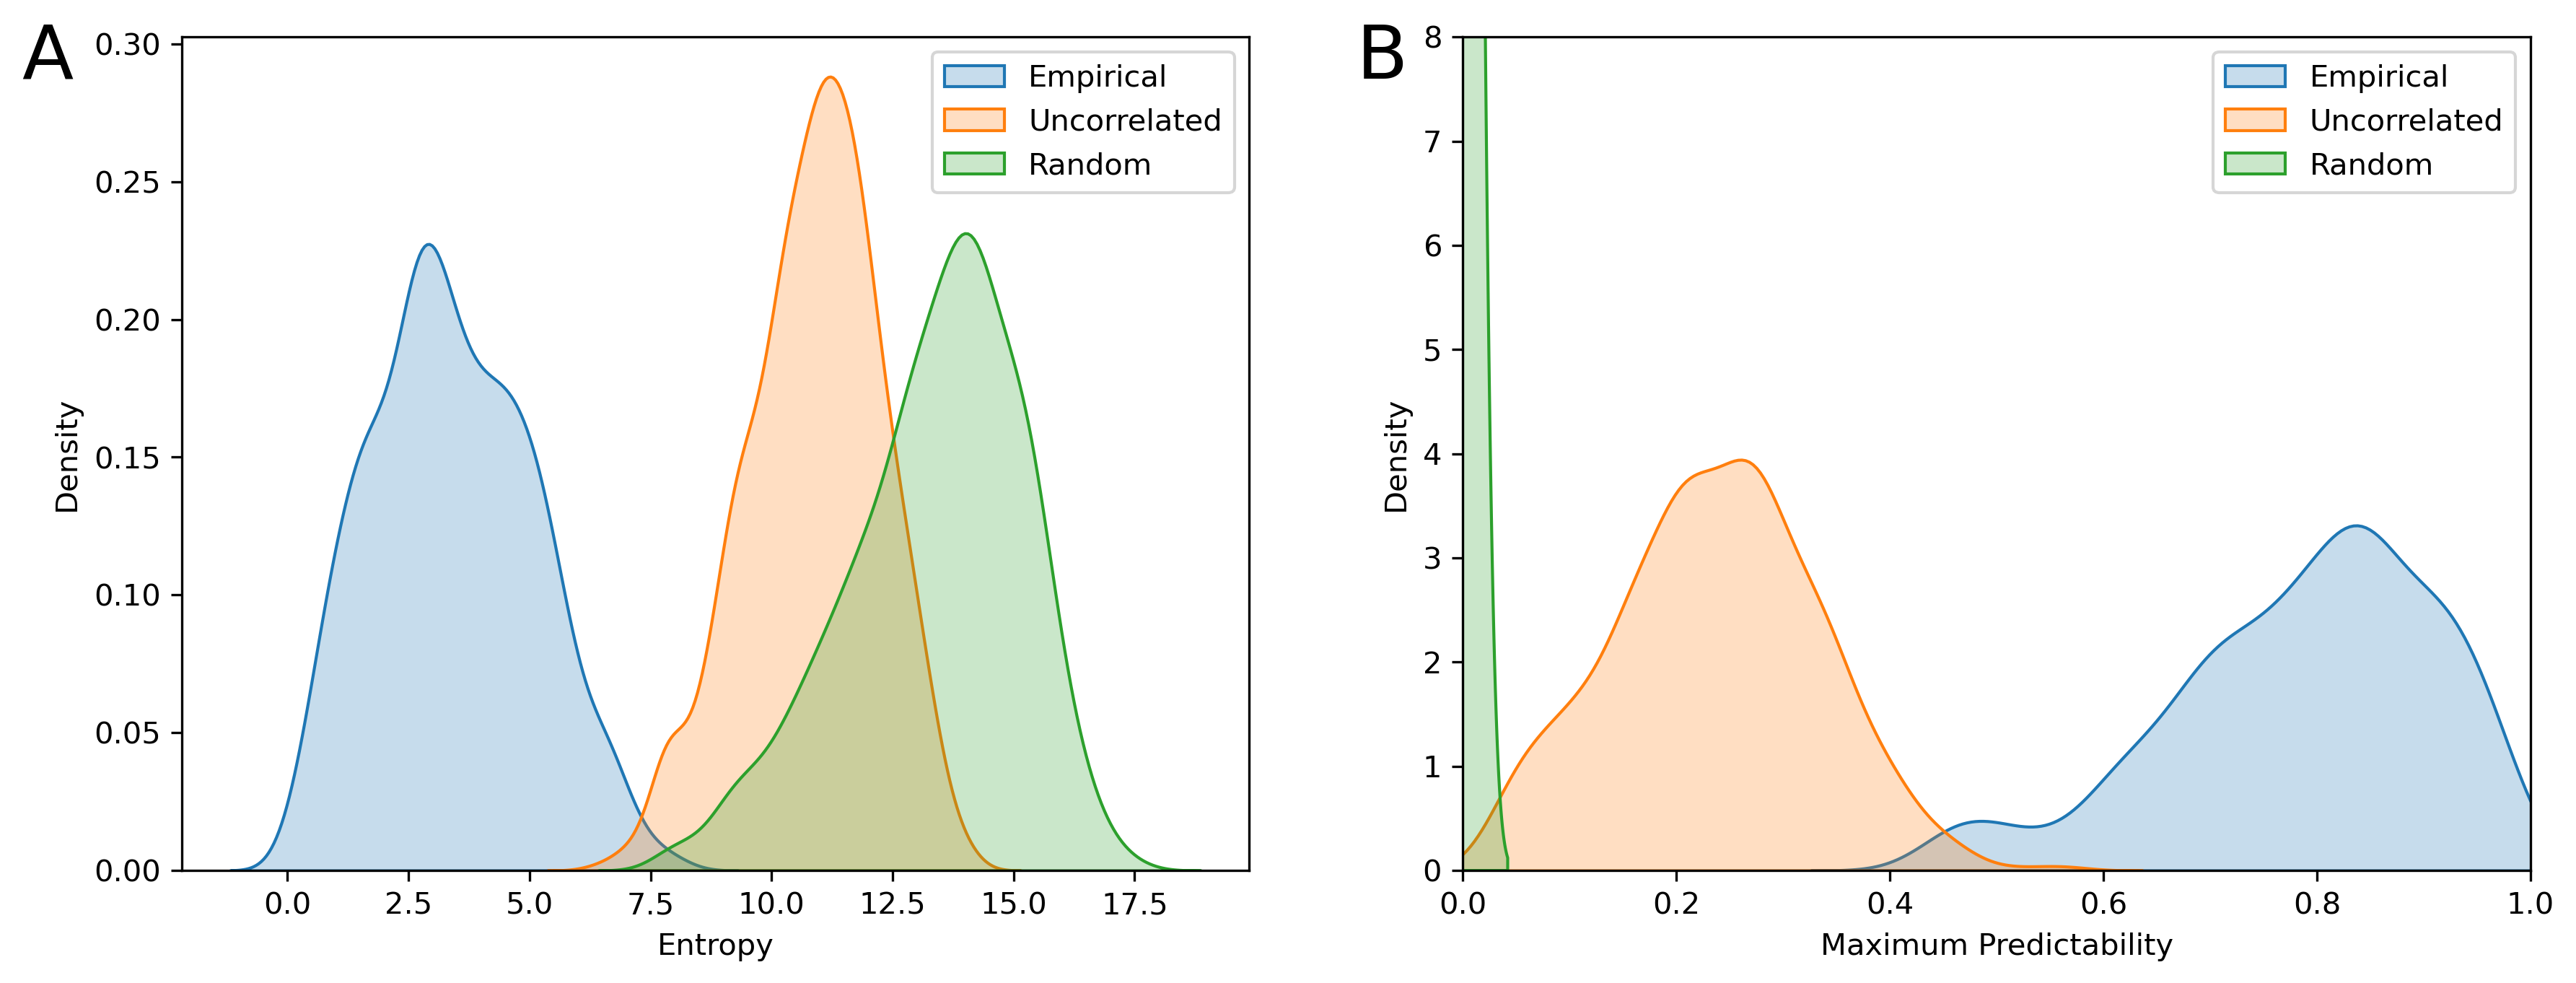

In [44]:
fig, ax = plt.subplots(1,2, figsize=(14,5), dpi=300)

sns.kdeplot(entropy, label="Empirical", fill="red", ax=ax[0])
sns.kdeplot(entropy_uncorrelated, label="Uncorrelated",fill="green", ax=ax[0])
sns.kdeplot(entropy_random, label="Random",fill="blue", ax=ax[0])


ax[0].set_xlabel("Entropy")
ax[0].legend()

sns.kdeplot(P_max_list, label = "Empirical", fill="red", ax=ax[1])
sns.kdeplot(P_max_unc_list, label = "Uncorrelated", fill="green", ax=ax[1])
sns.kdeplot(P_max_rand_list, label = "Random", fill="blue", bw_adjust=100, ax=ax[1])
ax[1].set_xlabel("Maximum Predictability")
ax[1].set_ylim(0,8)
ax[1].set_xlim(0,1)
ax[1].legend()

ax[0].annotate("A", fontsize= 25, xy=(-0.15, 0.95), xycoords="axes fraction")
ax[1].annotate("B", fontsize= 25, xy=(-0.1, 0.95), xycoords="axes fraction")

fig.savefig('entropy_predictability.png', dpi=300)

In [42]:
print(P_max_list.mean())
print(P_max_list.std())

print(P_max_unc_list.mean())
print(P_max_unc_list.std())

print(P_max_rand_list.mean())
print(P_max_rand_list.std())

0.7871782297370998
0.12448518770225925
0.2372869048144688
0.09604416168889508
0.00024119626873552849
0.0004890527533680513


In [46]:
import scipy.stats as stats

In [47]:
stats.ttest_rel(P_max_list, P_max_unc_list)

Ttest_relResult(statistic=178.33027975762081, pvalue=0.0)

In [48]:
stats.ttest_rel(P_max_list, P_max_rand_list)

Ttest_relResult(statistic=191.2957301709577, pvalue=0.0)

In [49]:
stats.ttest_rel(P_max_unc_list, P_max_rand_list)

Ttest_relResult(statistic=74.6847261074994, pvalue=0.0)

In [75]:
predictability_df = pd.DataFrame({"P_max":P_max_list,
                                 "P_max_unc":P_max_unc_list,
                                 "P_max_rand":P_max_rand_list})

In [76]:
predictability_df

,P_max,P_max_unc,P_max_rand
0,0.918843,0.284338,0.000061
1,0.886373,0.293925,0.000018
2,0.791401,0.249851,0.000051
3,0.895134,0.224569,0.000053
4,0.948561,0.405127,0.000049
...,...,...,...
915,0.898055,0.431022,0.000201
916,0.825233,0.557484,0.000104
917,0.847158,0.285348,0.000029
918,0.918520,0.396081,0.000033


# MC models predictability

In [50]:
import multiprocessing

In [51]:
from utils import Markov

In [63]:
history_df

,userid,timestamp,musicbrainz_artist_id,artist_name,musicbrainz-track_id,track_name,artist_track,artist_tags,artist_name_corrected
0,1,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,"['Deep Dish', 'Fuck Me Im Famous (Pacha Ibiza)...","House, electronic, dance, Progressive House, t...",Deep Dish
1,1,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),"['坂本龍一', 'Composition 0919 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
2,1,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),"['坂本龍一', 'Mc2 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
3,1,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),"['坂本龍一', 'Hibari (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
4,1,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),"['坂本龍一', 'Mc1 (Live_2009_4_15)']","japanese, ambient, electronic, Soundtrack, pia...",坂本龍一
...,...,...,...,...,...,...,...,...,...
19098857,1000,2008-01-27 22:02:35,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me,"['Wilco', 'Please Be Patient With Me']","Alt-country, indie, seen live, indie rock, alt...",Wilco
19098858,1000,2008-01-27 21:56:52,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off,"['Wilco', 'Shake It Off']","Alt-country, indie, seen live, indie rock, alt...",Wilco
19098859,1000,2008-01-27 21:52:36,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds,"['Wilco', 'Side With The Seeds']","Alt-country, indie, seen live, indie rock, alt...",Wilco
19098860,1000,2008-01-27 21:49:12,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky,"['Wilco', 'Sky Blue Sky']","Alt-country, indie, seen live, indie rock, alt...",Wilco


In [64]:
def obtain_ool_accuracy(user):
    history = history_df.loc[history_df.userid == user]
    sequence = pd.factorize(history.artist_track)[0]
    ool_accuracy = Markov.loo_evaluate_accuracy(sequence)
    return ool_accuracy

In [65]:
pool_obj = multiprocessing.Pool(4)

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/jasongong/OneDrive/projects/information_navigation/music/last.fm/lastfm-dataset-1K/ICA22_computational/media_prediction/utils/Markov.py:122: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  pred_new_state = predict_markov(observed_p_matrix, track_next)
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/jasongong/OneDrive/projects/information_navigation/music/last.fm/lastfm-dataset-1K/ICA22_computational/media_prediction/utils/Markov.py:122: SparseEfficiencyWarning: Comparing a sparse matrix with 0 

In [67]:
ool_accuracy_list = pool_obj.map(obtain_ool_accuracy, user_list)

In [68]:
ool_accuracy_list = np.array(ool_accuracy_list)
print(ool_accuracy_list.mean())
print(ool_accuracy_list.std())

0.2119245499386997
0.1754991676155977


In [77]:
predictability_df["mc_predicatbility"] = ool_accuracy_list
predictability_df["mc_predict_error"] = P_max_list-ool_accuracy_list

In [79]:
predictability_df

,P_max,P_max_unc,P_max_rand,mc_predicatbility,mc_predict_error
0,0.918843,0.284338,0.000061,0.607085,0.311758
1,0.886373,0.293925,0.000018,0.386709,0.499664
2,0.791401,0.249851,0.000051,0.138775,0.652626
3,0.895134,0.224569,0.000053,0.190233,0.704901
4,0.948561,0.405127,0.000049,0.498500,0.450060
...,...,...,...,...,...
915,0.898055,0.431022,0.000201,0.260834,0.637221
916,0.825233,0.557484,0.000104,0.065762,0.759471
917,0.847158,0.285348,0.000029,0.456760,0.390398
918,0.918520,0.396081,0.000033,0.311623,0.606897


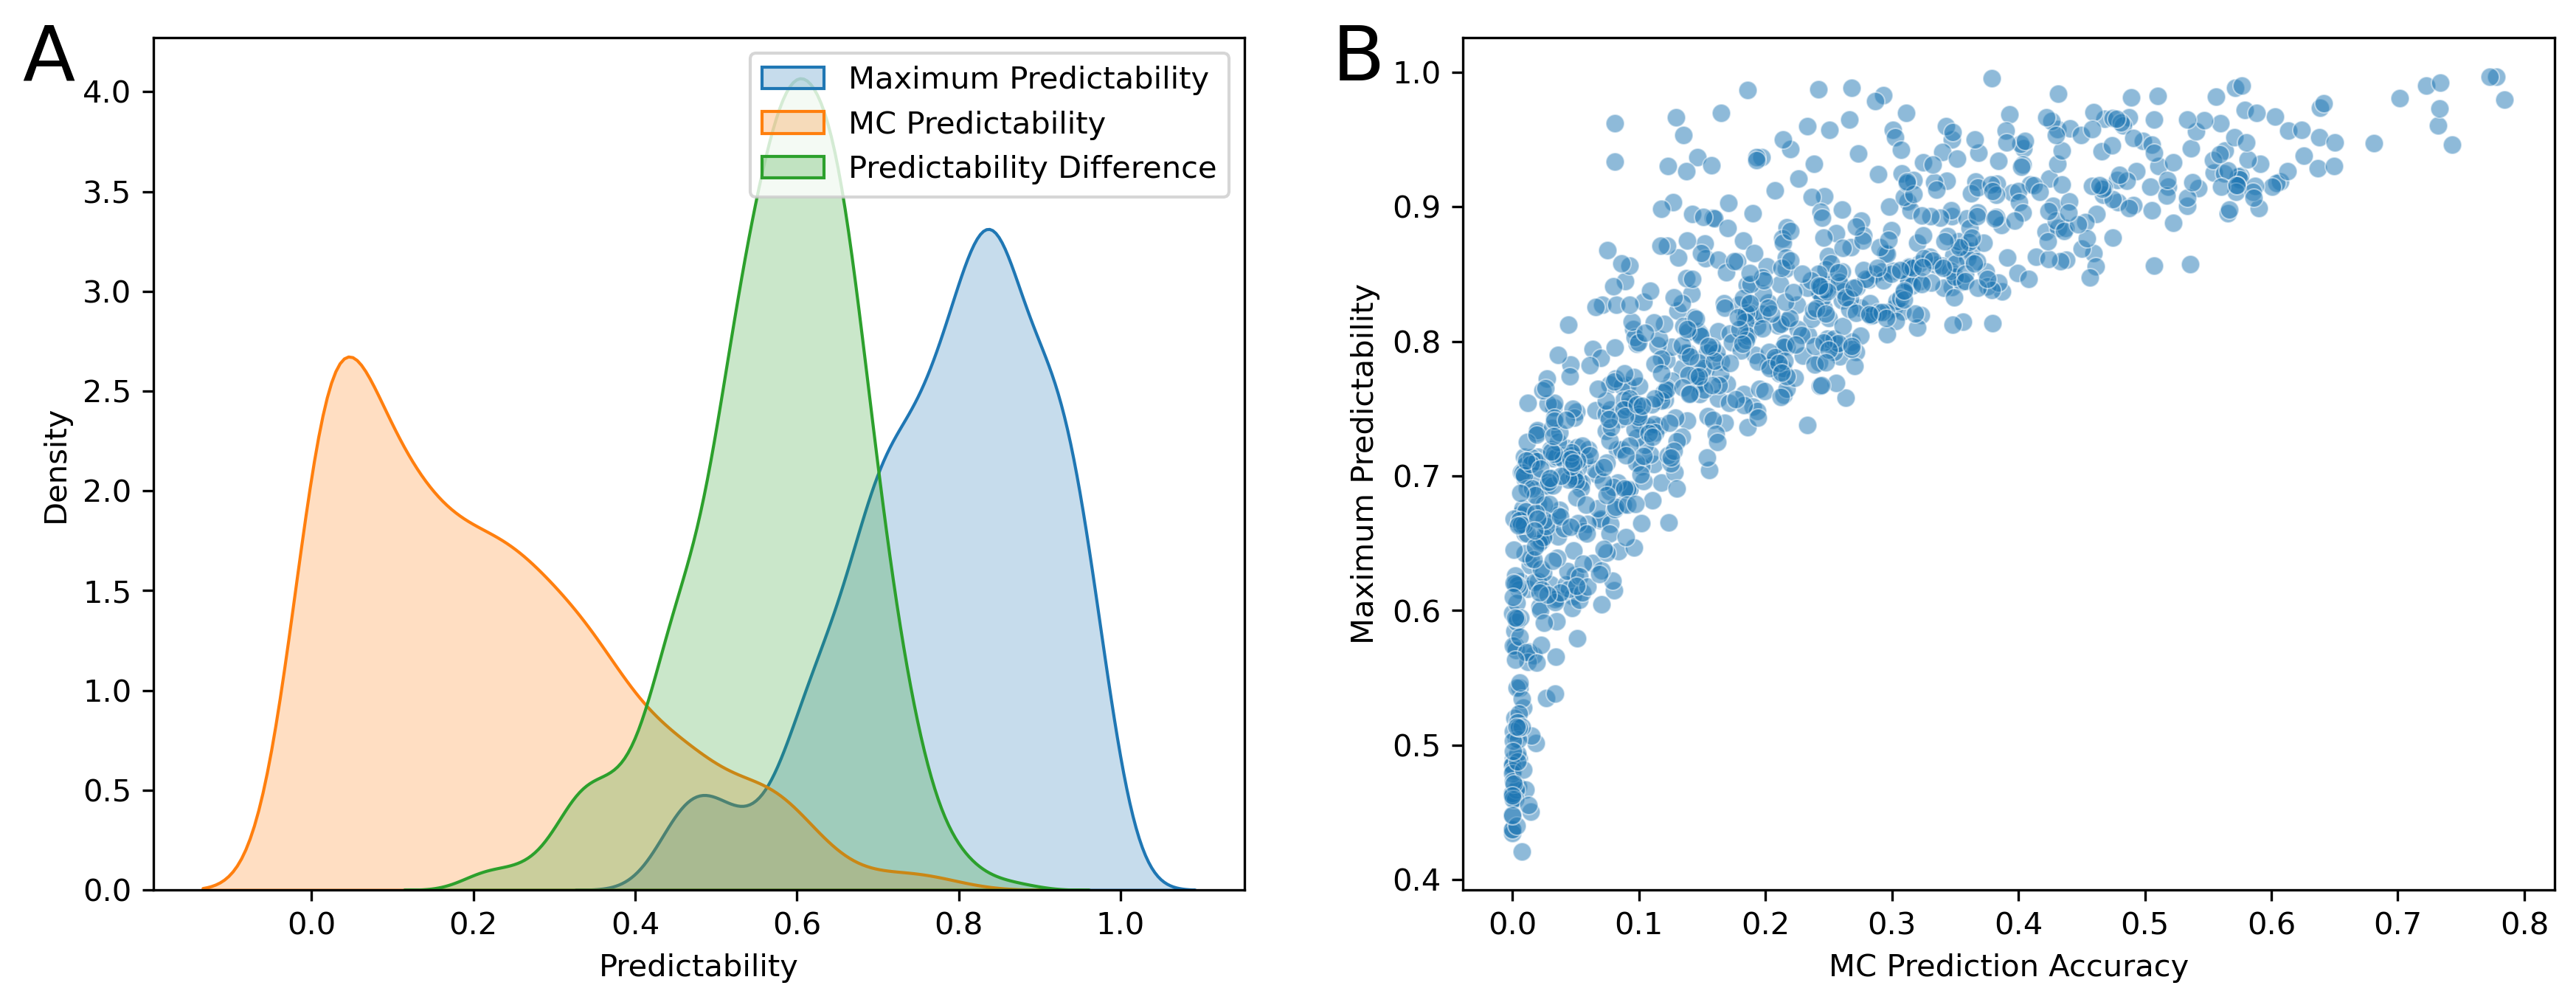

In [78]:
fig, ax = plt.subplots(1,2, figsize=(14,5), dpi=300)

sns.kdeplot(predictability_df.P_max, label="Maximum Predictability", fill="red", ax=ax[0])
sns.kdeplot(predictability_df.mc_predicatbility, label="MC Predictability",fill="green", ax=ax[0])
sns.kdeplot(predictability_df.mc_predict_error, label="Predictability Difference",fill="blue", ax=ax[0])
ax[0].set_xlabel("Predictability")
ax[0].legend()

sns.scatterplot(data=predictability_df, x = "mc_predicatbility", y = "P_max", alpha=0.5, ax=ax[1])
ax[1].set_xlabel("MC Prediction Accuracy")
ax[1].set_ylabel("Maximum Predictability")

ax[0].annotate("A", fontsize= 25, xy=(-0.12, 0.95), xycoords="axes fraction")
ax[1].annotate("B", fontsize= 25, xy=(-0.12, 0.95), xycoords="axes fraction")

fig.savefig('MC_predictability.png', dpi=300)